In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.integrate import cumtrapz

# Numerical Integration

## Functions

In [50]:
def f1(x):
    return np.exp(-np.power(x, 2)) * np.power(np.log(x), 2)

def f2(x):
    return 1 / (np.power(x, 3) - 2 * x - 5)

def f3(x):
    return np.power(x, 5) * np.exp(-x) * np.sin(x)

def f4(x, y):
    assert 0 <= x <= 1
    assert 0 <= y <= 1-x
    return 1 / (np.sqrt(x + y) * (1 + x + y))

def f5(x, y):
    assert -3 <= x <= 3
    assert -5 <= y <= 5
    return np.power(x, 2) + np.power(y, 2)

funcs = [f1, f2, f3, f4, f5]

## Speed sample & estimated distance traveled

In [9]:
def estimate_distance(instantaneous_speed, time): # km/h, seconds
    assert len(instantaneous_speed) == len(time)
    result = 0
    for i, v1 in enumerate(instantaneous_speed[:-1]):
        v2 = instantaneous_speed[i+1]
        t1 = time[i]
        t2 = time[i+1]
        result += (t2 - t1) * (v1 + v2) / 2
    return result

distance = 

In [85]:
def plot_estimated_distance(instantaneous_speed, time):
    data = np.zeros(sum(time))
    data = cumtrapz(instantaneous_speed, time, initial=0)
    plt.plot(data)
    plt.title('Estimated Distance')
    plt.xlabel('Time (s)')
    plt.ylabel('Distance (km)')
    plt.show()

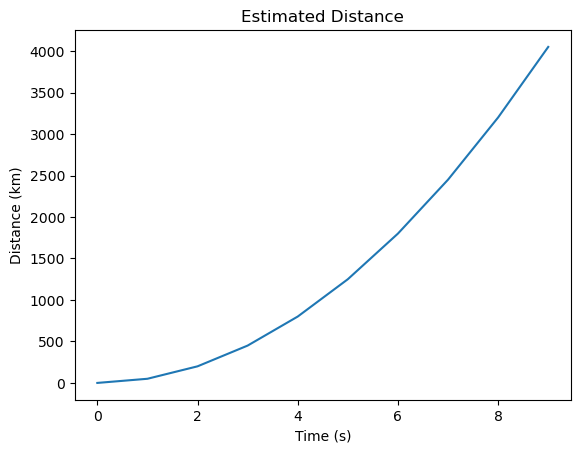

In [86]:
speed = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
time =  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
plot_estimated_distance(speed, time)

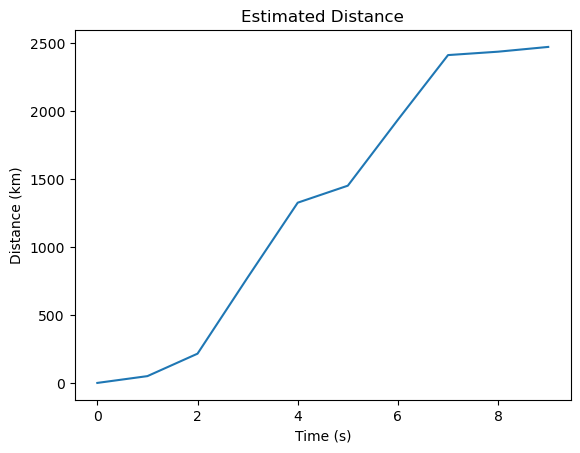

In [88]:
time = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
speed = [0, 10, 23, 89, 21, 4, 93, 2, 3, 4]
plot_estimated_distance(speed, time)

## Simpson's quadrature

In [41]:
# ∫from a to b [f(x) dx] ≈ (b - a) / 6 * [f(a) + 4f((a+b)/2) + f(b)]
# ∫from a to b [f(x) dx] ≈ h / 3 * [y_0 + 4 * (y_1 + y_3 + ... + y_(n-1)) + 2 * (y_2+ y_4 + ... + y_(n-2)) + y_n]
def simpson_quad(x, y):
    return (x[1]-x[0])/3 * (y[0] + 2*sum(y[::2]) + 4*sum(y[1::2]) + y[len(y)-1])

/var/folders/lb/04bhkkjs24v8lqvxw_wwqsth0000gn/T/ipykernel_1679/212192743.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lib = (scipy.integrate.quad(func, x0, xn))[0]


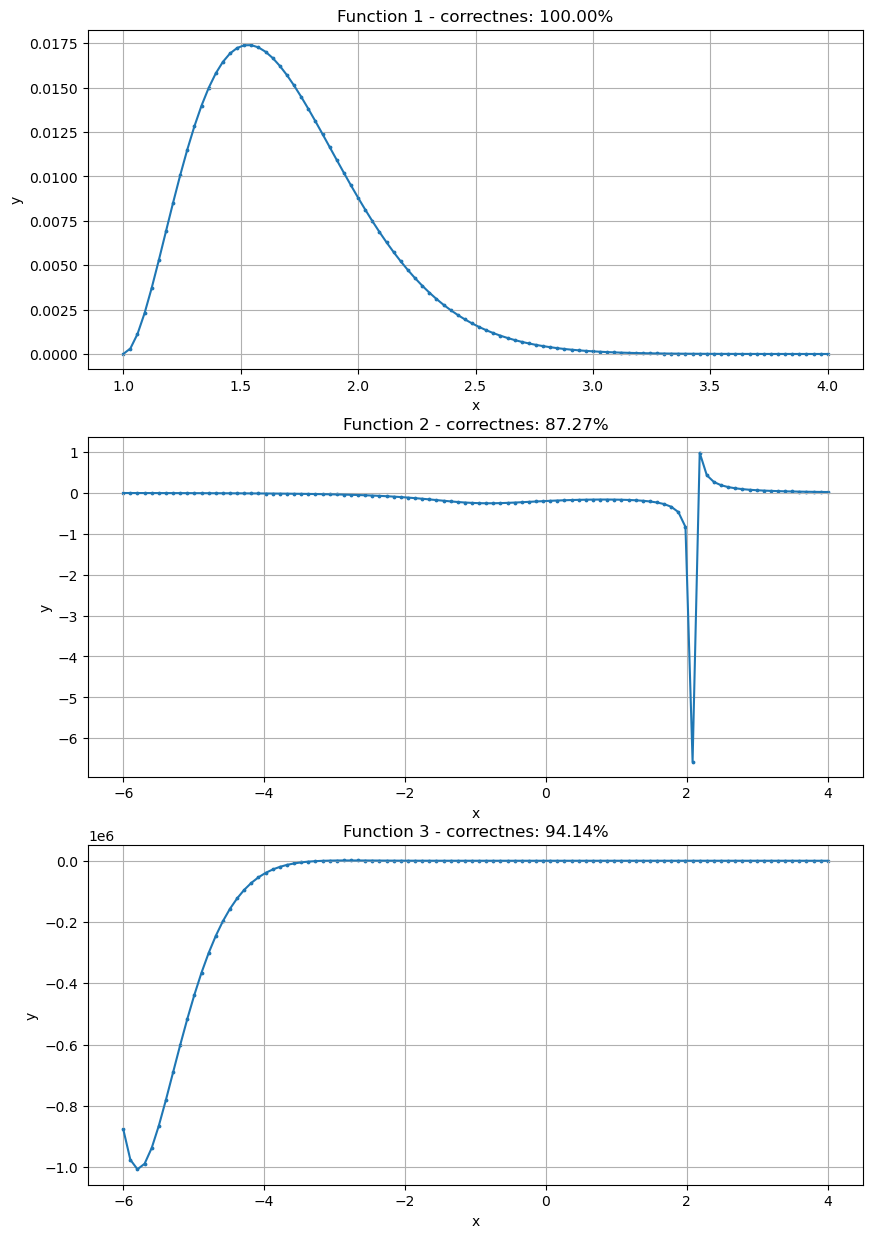

In [67]:
def plot_simpson_quads(data):
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))
    for i, func in enumerate(funcs[:3]):
        x0, xn = data[i]
        x = np.linspace(x0, xn, 100)
        y = func(x)
        mine = simpson_quad(x, y)
        lib = (scipy.integrate.quad(func, x0, xn))[0]
        ax[i].plot(x, y)
        ax[i].scatter(x, y, s=3)
        ax[i].set_title(f"Function {i+1} - correctnes: {(1 - (abs(mine - lib) / abs(lib)))*100:.2f}%")
        ax[i].set_xlabel("x")
        ax[i].set_ylabel("y")
        ax[i].grid()
    plt.show()
    
data = [ (1, 4), (-6, 4), (-6, 4)]
plot_simpson_quads(data)

## Definite double integrals

In [77]:
def integrate2(function, x_range, y_range, delta):
    result = 0.0

    x = x_range[0] + delta / 2
    while x <= x_range[1] + delta:

        y = y_range[0] + delta / 2
        while y <= y_range[1] + delta:
            result += delta**2 * function(x, y)

            y += delta
        x += delta

    return result

In [79]:
xs = [-3, 3]
ys = [-5, 5]

groundtruth = scipy.integrate.dblquad(f5, xs[0], xs[1], ys[0], ys[1])[0]

print(groundtruth)
for d in [0.1, 0.01, 0.001]:
    result = integrate2(f5, xs, ys, delta=d)
    print(f"delta = {d}, error = {abs(groundtruth - result)}")

680.0
delta = 0.1, error = 34.984049999999684
delta = 0.01, error = 3.4217440049631023
delta = 0.001, error = 0.3414173441327648
